In [1]:
#Домашнее задание. Pandas
#Когон Светлана, группа М1О-107М-21

In [2]:
import pandas as pd
df = pd.read_csv('data/TSLA.csv');

In [3]:
#1. Вывести все колонки из DataFrame - я так поняла, требуется название этих 7 колонок (чтобы потом к ним обращаться)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [4]:
#2.Посчитать среднюю цену закрытия акций Tesla, в период с открытия по 10.01.2012.
# Средняя цена закрытия - это Adj Close. Нужно взять строки с 1 по ту, у которой Date<=10.01.2012, 
#и от этих средних цен еще посчитать среднюю арифметическую
a=len(df[df['Date'] <= '2012-01-10']['Date'])
print(a) #нашли индекс строки с нужной датой
df1=df.head(a) #задали укороченный датафрейм. 
# Поскольку данные в таблице по возрастанию даты, можно не париться и просто начало взятть
df1['Adj Close'].mean()

388


25.654458737113384

In [ ]:
#3. Вывести график цены закрытия 

<AxesSubplot:>

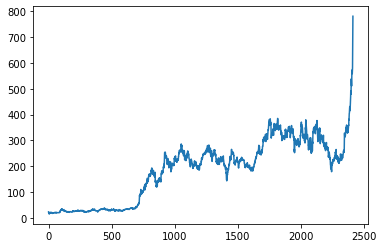

In [6]:
df['Close'].plot()

In [ ]:
#4. Нормализация. Примените формулу для нормализации значений:
# Xnorm=(X-Xmin)/(Xmax-Xmin)
#к столбцу Open (используйте метод apply).

In [16]:
Xmax=df['Open'].max()
Xmin=df['Open'].min()
df['Open'].apply(lambda x: (x-Xmin)/(Xmax-Xmin))

0       0.004349
1       0.014676
2       0.013474
3       0.010433
4       0.005870
          ...   
2411    0.840012
2412    0.850962
2413    0.937237
2414    0.948764
2415    1.000000
Name: Open, Length: 2416, dtype: float64

<AxesSubplot:>

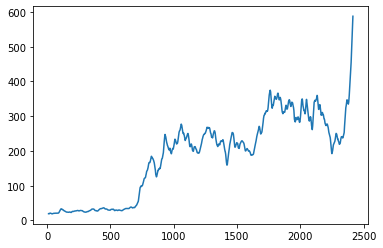

In [18]:
#5. Построить график с ценой закрытия и посчитаным SMA 12,15,30
# SMA 12 вычисляется путем нахождения среднего арифметического цен закрытия за последние 12 дней, а затем делится на 12.
# SMA 15 - соответственно, 15 дней и т.д.
# To calculate SMA, we use pandas.Series.rolling() method
df['Close'].rolling(window =12).mean().plot()

<AxesSubplot:>

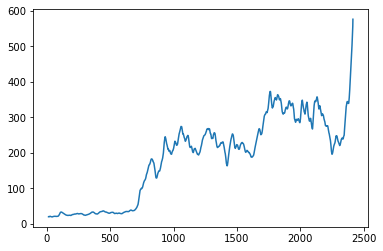

In [19]:
df['Close'].rolling(window =15).mean().plot()

<AxesSubplot:>

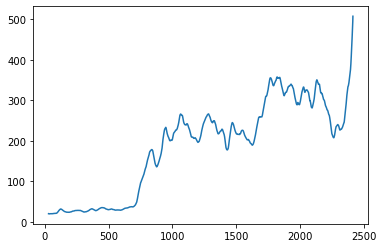

In [20]:
# видно, что разница между окном 12 и 15 - небольшая. А вот для окна =30 уже визуально заметна разница:
df['Close'].rolling(window =30).mean().plot()

<AxesSubplot:>

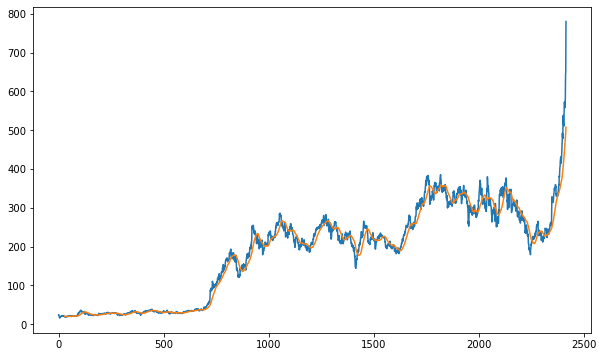

In [21]:
#для наглядности покажем оригинальный график и усредненный за 30 вместе
df['Close'].plot(figsize=(10,6))
df['Close'].rolling(window =30).mean().plot()

In [ ]:
# Посмотрите на график и подумайте, о чем говорит SMA. Когда стоит начать покупать/продавать акции Tesla?
# в идеале - купить надо было в период с июня по октябрь 2010, а продавать где-то 2021 (судя по графику,
# хотя имеющиеся у нас данные ограничены 2020-02-03, рост еще какое-то время будет)